# clean data

In [1]:
import pandas as pd
import os
import numpy as np

#Reading file
cwd=os.getcwd()
filename=cwd+ '/default of credit card clients.xls'
nanDict = {}
df = pd.read_excel(filename, header=1, skiprows=0, index_col=0, na_values=nanDict)
df.rename(index=str, columns={"default payment next month": "def_payment","PAY_0":"PAY_1"}, inplace=True)


In [2]:
#DEFINE CATEGORICAL AND CONTINUOUS VARIABLES
#CHECK VALUES TO MAKE SURE THERE ARE APPROPRIATE
cat = ["SEX","EDUCATION","MARRIAGE", "PAY_1", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]
cont = ['LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 
        'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'] 
#for i in (cat):
#    values_counts=df[i].value_counts()
#    print("These are the observed values for " + str(i) + ":")
#    print(values_counts)

In [3]:
sex = [1,2]
education = [1,2,3,4]
marriage = [1,2,3]
payment = [0,1]
df = df[df["SEX"].isin(sex)]
df = df[df['EDUCATION'].isin(education)]
df = df[df['MARRIAGE'].isin(marriage)]
df = df[df['def_payment'].isin(payment)]
#We observe undocumented values for repayment status variables: -2 and 0.
#PAY-->4030 remaining observations-->too many 0 and -2
#len(df) #29601 remaining observations
#print(df)

In [4]:
# MOVE BAD VALUES TO ZERO
pay_var =  ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for var in pay_var:
    vals = (df[var]== 0) | (df[var] == -2)
    df.loc[vals,var] = 0


In [5]:
# REMOVE OUTLIERS

outlier_df = df
def find_outliers(data,variable,numb):
    sorted(variable)
    outliers=[]
    non_outliers=[]
    q1,q3=np.percentile(variable,[25,75])
    iqr=q3-q1
    low_bound=q1-(numb*iqr)
    upper_bound=q3+(numb*iqr)
    #print(q1,q3,iqr,low_bound,upper_bound)
    for i in variable:
        if i>upper_bound or i<low_bound:
            outliers.append(i)
        else:
            non_outliers.append(i)
    data=data[variable.isin(non_outliers)]
    return data
    
for i in cont:
    outliers_datapoints=find_outliers(outlier_df, outlier_df[i], 3)
    outlier_df = outliers_datapoints
    print(len(outlier_df))
print(outlier_df[cont].describe().transpose()) 
outlier_df.keys()

29600
29600
28816
28517
28228
28009
27780
27571
26202
25088
23995
23132
22396
21708
             count           mean            std      min       25%       50%  \
LIMIT_BAL  21708.0  138714.114612  112404.007007  10000.0  50000.00  110000.0   
AGE        21708.0      35.279759       9.428801     21.0     28.00      34.0   
BILL_AMT1  21708.0   37249.775106   44382.364963 -11545.0   2741.00   19767.5   
BILL_AMT2  21708.0   35110.322416   42156.885925 -18618.0   2168.75   18785.0   
BILL_AMT3  21708.0   32800.083425   39858.108440 -46127.0   1659.75   17992.0   
BILL_AMT4  21708.0   29752.189469   36979.239200 -50616.0   1223.50   16643.0   
BILL_AMT5  21708.0   27431.838769   35061.361583 -53007.0    913.00   14686.5   
BILL_AMT6  21708.0   26303.052607   34511.644103 -94625.0    650.00   12473.5   
PAY_AMT1   21708.0    2499.212364    2574.754800      0.0    416.00    1945.0   
PAY_AMT2   21708.0    2336.034642    2416.846365      0.0    390.00    1757.0   
PAY_AMT3   21708.0    196

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'def_payment'],
      dtype='object')

In [6]:
defaults = outlier_df['def_payment'].value_counts()
total = outlier_df['def_payment'].shape[0]
print('Default Rate of cleaned data is: ', defaults[0]/total)
        

Default Rate of cleaned data is:  0.7488944168048646


(0, 24)

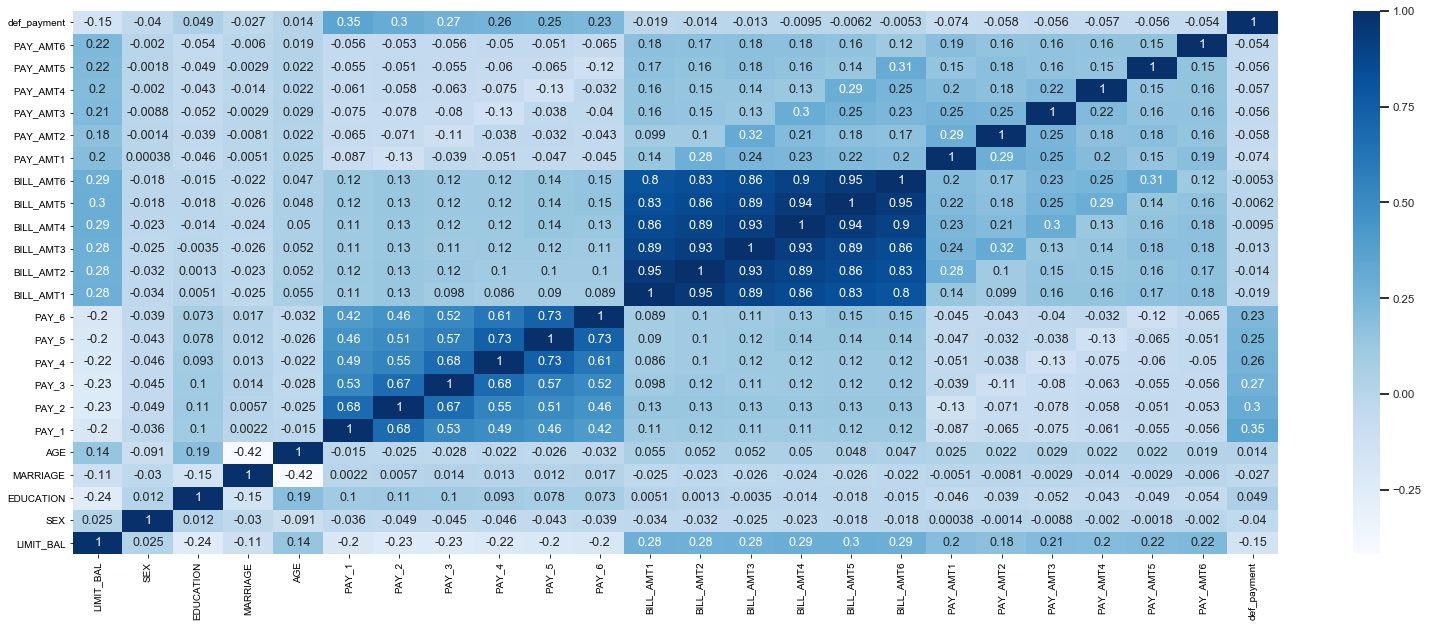

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#CORRELATION MATRIX OUTLIERS REMOVED
fig1, ax1 = plt.subplots(figsize = (27,10))
sns.set()
sns.set_context("talk", font_scale=0.7)
sns.heatmap(outlier_df.iloc[:,:].corr(), cmap='Blues', ax = ax1, annot=True)
plt.ylim(0,24)

In [7]:
#SEPARATE TARGETS AND TEST DATA
data_x= outlier_df.loc[:, outlier_df.columns != 'def_payment']
target= outlier_df.loc[:, outlier_df.columns == 'def_payment']
data_x.keys()
target.keys()

Index(['def_payment'], dtype='object')

# SCALE AND SPLIT DATA

In [8]:
from logistic_regression import LogisticRegression
from activation_functions import Activation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [9]:
# PREPARE DATA FOR BRUTE FORCE LOGISTIC REGRESSION

X = data_x
y = target


X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2)

# scale continuous values and pay_# values
scaler = StandardScaler()
scale_vars = cont + pay_var
static_vars = ["SEX","EDUCATION","MARRIAGE"]
cont_train = X_train[scale_vars]
cont_test = X_test[scale_vars]
scaler.fit(cont_train)
cont_train = scaler.transform(cont_train)
cont_test = scaler.transform(cont_test)


X_train = np.c_[cont_train, X_train[static_vars].values]
X_test = np.c_[cont_test, X_test[static_vars].values]
y_train = y_train.values
y_test = y_test.values




# LOG REG NO PCA

ANALYSIS USING SIGMOID

In [116]:
from sklearn.model_selection import KFold

#LOOP OVER HYPERPARAMETERS 
eta_vec = np.logspace(-5, 1, 7)
lam_vec = np.logspace(-5, 1, 7)
test_accuracy_sig = np.zeros((len(eta_vec), len(lam_vec)))




for i, eta in enumerate(eta_vec):
    for j, lam in enumerate(lam_vec):
        kf = KFold(n_splits = 5, shuffle = True)
        accuracy = 0
        for tr_idx, val_idx in kf.split(X_train):          
            bf = LogisticRegression(X_train[tr_idx], y_train[tr_idx], X_train[val_idx], y_train[val_idx], 
                                    ['SIGMOID'], eta = eta, lambd = lam, epochs = 100, batchs = 20)
            bf.train()
            bf.predict()
            pred = bf.score_binary()
            accuracy += bf.accuracy_metric(pred, y_train[val_idx])
        accuracy = accuracy/5
        test_accuracy_sig[i][j] = accuracy


/Users/douglas/Fall_2019/FYS4155/project2/activation_functions.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
/Users/douglas/Fall_2019/FYS4155/project2/logistic_regression.py:59: RuntimeWarning: overflow encountered in matmul
  return self.activation.func(np.matmul(a,b))
/Users/douglas/Fall_2019/FYS4155/project2/logistic_regression.py:84: RuntimeWarning: overflow encountered in multiply
  gradient += self._lam*self._beta
/Users/douglas/Fall_2019/FYS4155/project2/logistic_regression.py:59: RuntimeWarning: invalid value encountered in matmul
  return self.activation.func(np.matmul(a,b))
/Users/douglas/Fall_2019/FYS4155/project2/logistic_regression.py:98: RuntimeWarning: invalid value encountered in greater
  self._predict[np.where(self._predict > .5)] = 1
/Users/douglas/Fall_2019/FYS4155/project2/logistic_regression.py:85: RuntimeWarning: overflow encountered in multiply
  self._beta -= self._eta * gradient


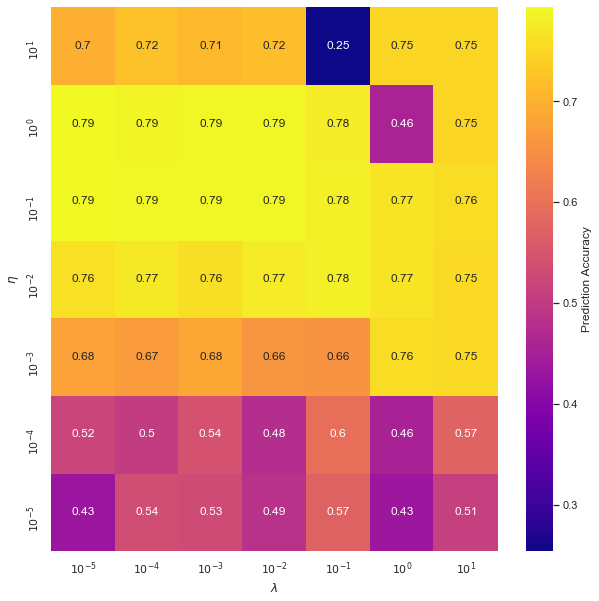

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
#PLOT OVER HYPERPARAMETERS BRUTE FORCE
#SIGMOID

sns.set()
labels = ['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$','$10^1$',]
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy_sig, annot=True, ax=ax, cmap="plasma", cbar_kws={'label': 'Prediction Accuracy'})
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.ylim(0,7)
plt.show()



In [44]:
# TESTING DIFFERENT EPOCHS AND BATCH SIZES
epoch_vals = np.concatenate((np.array([1]),np.arange(10,101,10)), axis=0) #1, 10, 20, ...100
batch_vals = [8,16,32,64,128,256] #2^N
accuracy_mat_sig_logreg = np.zeros((len(epoch_vals),len(batch_vals)))
for i, batch in enumerate(batch_vals):
    for j, val in enumerate(epoch_vals):
        bf = LogisticRegression(X_train, y_train, X_test, y_test, 
                                    ['SIGMOID'], eta = 5e-1, lambd = 5e-3, epochs = val, batchs = batch)
        bf.train()
        bf.predict()
        pred = bf.score_binary()
        accuracy = bf.accuracy_metric(pred, y_test)
        print(accuracy)
        accuracy_mat_sig_logreg[j][i] = accuracy


0.7081989866421005
0.7867342238599724
0.7899585444495624
0.7869645324735145
0.786273606632888
0.7881160755412252
0.7878857669276831
0.7867342238599724
0.7855826807922617
0.789267618608936
0.7874251497005988
0.7494242284661446
0.7874251497005988
0.7828189774297559
0.7842008291110087
0.7865039152464303
0.7851220635651773
0.7883463841547674
0.7855826807922617
0.7890373099953938
0.7883463841547674
0.7867342238599724
0.7494242284661446
0.7885766927683096
0.787655458314141
0.7888070013818517
0.7904191616766467
0.7899585444495624
0.7915707047443574
0.7837402118839245
0.7904191616766467
0.7881160755412252
0.7844311377245509
0.7770612620912022
0.787655458314141
0.7851220635651773
0.7911100875172732
0.7878857669276831
0.7851220635651773
0.7865039152464303
0.7865039152464303
0.7846614463380931
0.7927222478120681
0.7816674343620451
0.7835099032703823
0.7881160755412252
0.786273606632888
0.790879778903731
0.790879778903731
0.7823583602026716
0.7881160755412252
0.7740672501151543
0.7779824965453708


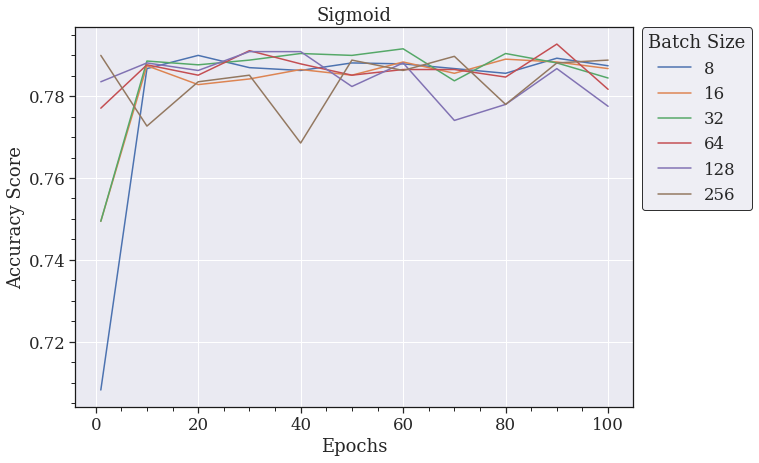

In [49]:
fig, ax = plt.subplots(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_style('dark',{'axes.edgecolor': '.1','xtick.bottom': True,'ytick.left': True,'axes.grid':True,
                      'grid.color':'white','font.family':['serif'],'font.serif':['serif']})

ax.plot(epoch_vals, accuracy_mat_sig_logreg[:,0], label = '8')
ax.plot(epoch_vals, accuracy_mat_sig_logreg[:,1], label = '16')
ax.plot(epoch_vals, accuracy_mat_sig_logreg[:,2], label = '32')
ax.plot(epoch_vals, accuracy_mat_sig_logreg[:,3], label = '64')
ax.plot(epoch_vals, accuracy_mat_sig_logreg[:,4], label = '128')
ax.plot(epoch_vals, accuracy_mat_sig_logreg[:,5], label = '256')
leg = ax.legend(title = 'Batch Size',bbox_to_anchor=(1, 1.02), fancybox = True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy Score')
ax.set_title('Sigmoid')
ax.minorticks_on()


FITTING TEST DATA

In [43]:
# USE ETA = 10E-1 AND LAMBDA = 10E-3
bf_sig = LogisticRegression(X_train, y_train, X_test, y_test, ['SIGMOID'], eta = 1e-1, lambd = 1e-2, 
                        epochs = 100, batchs = 20)
bf_sig.train()
bf_sig.predict()
pred = bf_sig.score_binary()
accuracy = bf_sig.accuracy_metric(pred, y_test)
print('Fit accuract to test data= ', accuracy)


Fit accuract to test data=  0.7842008291110087


ANALYSIS USING TANH

In [125]:
#LOOP OVER HYPERPARAMETERS 
eta_vec = np.logspace(-5, 1, 7)
lam_vec = np.logspace(-5, 1, 7)
test_accuracy_tanh = np.zeros((len(eta_vec), len(lam_vec)))




for i, eta in enumerate(eta_vec):
    for j, lam in enumerate(lam_vec):
        kf = KFold(n_splits = 5, shuffle = True)
        accuracy = 0
        for tr_idx, val_idx in kf.split(X_train):          
            bf = LogisticRegression(X_train[tr_idx], y_train[tr_idx], X_train[val_idx], y_train[val_idx], 
                                    ['TANH'], eta = eta, lambd = lam, epochs = 100, batchs = 20)
            bf.train()
            bf.predict()
            pred = bf.score_binary()
            accuracy += bf.accuracy_metric(pred, y_train[val_idx])
        accuracy = accuracy/5
        test_accuracy_tanh[i][j] = accuracy

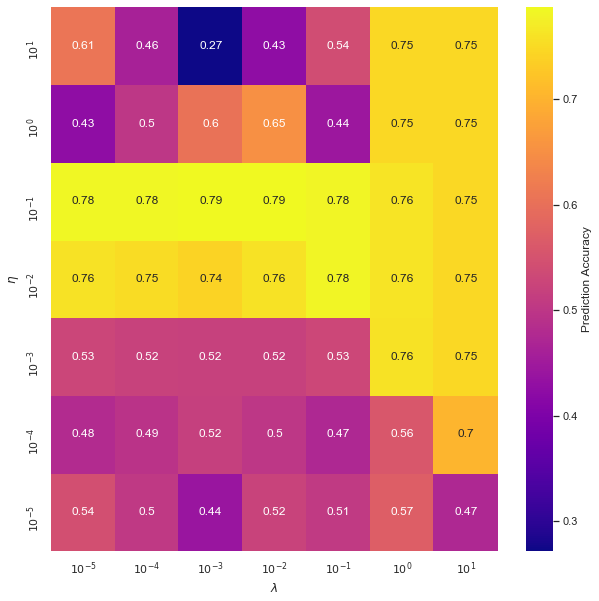

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
#PLOT OVER HYPERPARAMETERS BRUTE FORCE
#SIGMOID

sns.set()
labels = ['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$','$10^1$',]
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy_tanh, annot=True, ax=ax, cmap="plasma", cbar_kws={'label': 'Prediction Accuracy'})
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.ylim(0,7)
plt.show()

In [53]:
# TESTING DIFFERENT EPOCHS AND BATCH SIZES
epoch_vals = np.concatenate((np.array([1]),np.arange(10,101,10)), axis=0) #1, 10, 20, ...100
batch_vals = [8,16,32,64,128,256] #2^N
accuracy_mat_tanh_logreg = np.zeros((len(epoch_vals),len(batch_vals)))
for i, batch in enumerate(batch_vals):
    for j, val in enumerate(epoch_vals):
        bf = LogisticRegression(X_train, y_train, X_test, y_test, 
                                    ['TANH'], eta = 1e-1, lambd = 5e-3, epochs = val, batchs = batch)
        bf.train()
        bf.predict()
        pred = bf.score_binary()
        accuracy = bf.accuracy_metric(pred, y_test)
        accuracy_mat_tanh_logreg[j][i] = accuracy

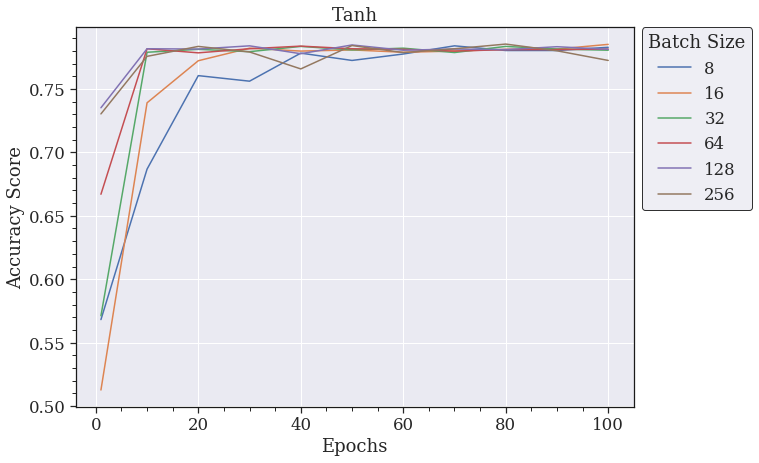

In [54]:
fig, ax = plt.subplots(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_style('dark',{'axes.edgecolor': '.1','xtick.bottom': True,'ytick.left': True,'axes.grid':True,
                      'grid.color':'white','font.family':['serif'],'font.serif':['serif']})

ax.plot(epoch_vals, accuracy_mat_tanh_logreg[:,0], label = '8')
ax.plot(epoch_vals, accuracy_mat_tanh_logreg[:,1], label = '16')
ax.plot(epoch_vals, accuracy_mat_tanh_logreg[:,2], label = '32')
ax.plot(epoch_vals, accuracy_mat_tanh_logreg[:,3], label = '64')
ax.plot(epoch_vals, accuracy_mat_tanh_logreg[:,4], label = '128')
ax.plot(epoch_vals, accuracy_mat_tanh_logreg[:,5], label = '256')
leg = ax.legend(title = 'Batch Size',bbox_to_anchor=(1, 1.02), fancybox = True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy Score')
ax.set_title('Tanh')
ax.minorticks_on()

FITTING TEST DATA

In [127]:
# USE ETA = 10E-1 AND LAMBDA = 10E-3
bf_sig = LogisticRegression(X_train, y_train, X_test, y_test, ['TANH'], eta = 10e-1, lambd = 10e-3, 
                        epochs = 100, batchs = 20)
bf_sig.train()
bf_sig.predict()
pred = bf_sig.score_binary()
accuracy = bf_sig.accuracy_metric(pred, y_test)
print('Fit accuract to test data= ', accuracy)

Fit accuract to test data=  0.7961768770152003


# LOG REG USING PCA 

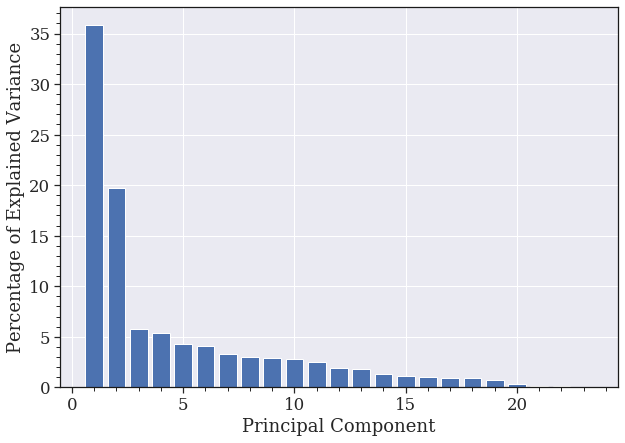

In [51]:
# ALL COMPONENTS VISUALIZED
from sklearn.decomposition import PCA

pca100 = PCA()
pca100_X_train = pca100.fit_transform(X_train)
per_var = pca100.explained_variance_ratio_*100

fig, ax = plt.subplots(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_style('dark',{'axes.edgecolor': '.1','xtick.bottom': True,'ytick.left': True,'axes.grid':True,
                      'grid.color':'white','font.family':['serif'],'font.serif':['serif']})
ax.bar(x=range(1,len(per_var)+1),height=per_var)
ax.set_ylabel("Percentage of Explained Variance")
ax.set_xlabel("Principal Component")
ax.minorticks_on()




In [106]:
# TAKING PCA FOR 95% OF VARIANCE TO GET NEW TRAINING DATA

pca95 = PCA(n_components = 0.95)
pca95.fit(X_train)
X_train_95 = pca95.transform(X_train)
X_test_95 = pca95.transform(X_test)
loading_scores_1=pd.Series(pca95.components_[0])
loading_scores_2=pd.Series(pca95.components_[1])

fmt = '{:<9} {:<8} {:<8}'
print(fmt.format('Variable', 'PC1', 'PC2'))
for i in range(len(pca95.components_[0])):
    print(fmt.format(i+1, np.round(loading_scores_1[i], decimals = 5), np.round(loading_scores_2[i], decimals = 5)))


Variable  PC1      PC2     
1         0.03325  -0.20111
2         -4e-05   -0.01793
3         0.32503  -0.01028
4         0.33741  -0.00059
5         0.34495  0.00705 
6         0.3474   0.01649 
7         0.34546  0.02187 
8         0.34106  0.02437 
9         0.21632  -0.11539
10        0.21824  -0.12373
11        0.22393  -0.11992
12        0.21836  -0.12514
13        0.21672  -0.11592
14        0.20423  -0.11716
15        0.049    0.35052 
16        0.06449  0.37877 
17        0.05997  0.39042 
18        0.06302  0.40166 
19        0.06701  0.39416 
20        0.06668  0.36537 
21        0.00359  -0.01716
22        0.00696  0.05109 
23        -0.00081 0.0072  


SIGMOID ANALYSIS

In [134]:
from sklearn.model_selection import KFold

#LOOP OVER HYPERPARAMETERS 
eta_vec = np.logspace(-5, 1, 7)
lam_vec = np.logspace(-5, 1, 7)
test_accuracy_sig_95 = np.zeros((len(eta_vec), len(lam_vec)))




for i, eta in enumerate(eta_vec):
    for j, lam in enumerate(lam_vec):
        kf = KFold(n_splits = 5, shuffle = True)
        accuracy = 0
        for tr_idx, val_idx in kf.split(X_train_95):          
            bf = LogisticRegression(X_train_95[tr_idx], y_train[tr_idx], X_train_95[val_idx], y_train[val_idx], 
                                    ['SIGMOID'], eta = eta, lambd = lam, epochs = 100, batchs = 20)
            bf.train()
            bf.predict()
            pred = bf.score_binary()
            accuracy += bf.accuracy_metric(pred, y_train[val_idx])
        accuracy = accuracy/5
        test_accuracy_sig_95[i][j] = accuracy

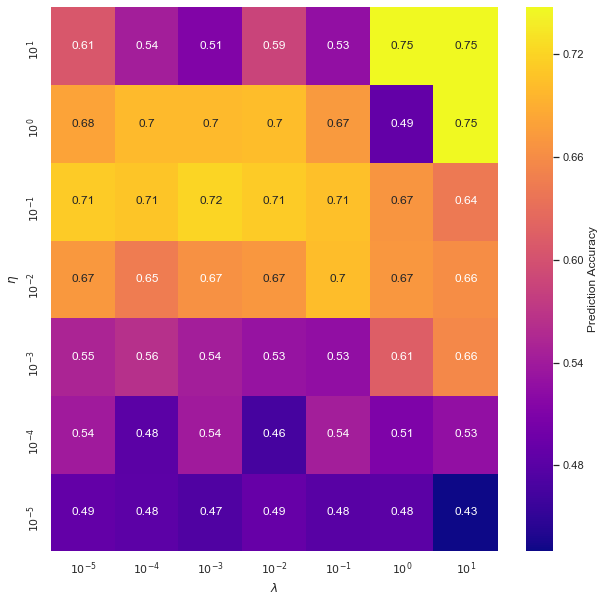

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
#PLOT OVER HYPERPARAMETERS PCA
#SIGMOID

sns.set()
labels = ['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$','$10^1$',]
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy_sig_95, annot=True, ax=ax, cmap="plasma", cbar_kws={'label': 'Prediction Accuracy'})
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.ylim(0,7)
plt.show()


In [137]:
# FIT TO TEST DATA USE ETA = 10E-1 AND LAMBDA = 10E-3
bf_sig = LogisticRegression(X_train_95, y_train, X_test_95, y_test, ['SIGMOID'], eta = 10e-1, lambd = 10e-3, 
                        epochs = 100, batchs = 20)
bf_sig.train()
bf_sig.predict()
pred = bf_sig.score_binary()
accuracy = bf_sig.accuracy_metric(pred, y_test)
print('Fit accuract to test data= ', accuracy)


Fit accuract to test data=  0.7167204053431598


TANH ANALYSIS

In [138]:
from sklearn.model_selection import KFold

#LOOP OVER HYPERPARAMETERS 
eta_vec = np.logspace(-5, 1, 7)
lam_vec = np.logspace(-5, 1, 7)
test_accuracy_tanh_95 = np.zeros((len(eta_vec), len(lam_vec)))




for i, eta in enumerate(eta_vec):
    for j, lam in enumerate(lam_vec):
        kf = KFold(n_splits = 5, shuffle = True)
        accuracy = 0
        for tr_idx, val_idx in kf.split(X_train_95):          
            bf = LogisticRegression(X_train_95[tr_idx], y_train[tr_idx], X_train_95[val_idx], y_train[val_idx], 
                                    ['TANH'], eta = eta, lambd = lam, epochs = 100, batchs = 20)
            bf.train()
            bf.predict()
            pred = bf.score_binary()
            accuracy += bf.accuracy_metric(pred, y_train[val_idx])
        accuracy = accuracy/5
        test_accuracy_tanh_95[i][j] = accuracy

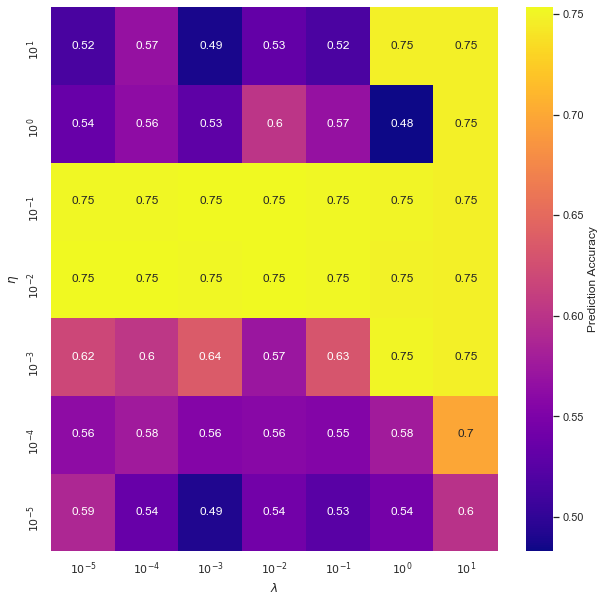

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
#PLOT OVER HYPERPARAMETERS PCA
#TANH

sns.set()
labels = ['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$','$10^1$',]
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy_tanh_95, annot=True, ax=ax, cmap="plasma", cbar_kws={'label': 'Prediction Accuracy'})
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.ylim(0,7)
plt.show()

In [146]:
# FIT TO TEST DATA USE ETA = 10E-1 AND LAMBDA = 10E-3
bf_tanh = LogisticRegression(X_train_95, y_train, X_test_95, y_test, ['TANH'], eta = 10e-2, lambd = 10e-3, 
                        epochs = 100, batchs = 20)
bf_tanh.train()
bf_tanh.predict()
pred = bf_tanh.score_binary()
accuracy = bf_tanh.accuracy_metric(pred, y_test)
print('Fit accuract to test data= ', accuracy)

Fit accuract to test data=  0.7581759557807461


# NEURAL NET ANALYSIS

In [11]:
from activation_functions import Activation
from neural_net import Neural_Network

In [25]:
from sklearn.model_selection import KFold
import numpy as np
# 10 neurons, 2 layers

eta_vec = np.logspace(-5, 1, 7)
lam_vec = np.logspace(-5, 1, 7)
test_accuracy_NN = np.zeros((len(eta_vec), len(lam_vec)))

for i, eta in enumerate(eta_vec):
    for j, lam in enumerate(lam_vec):
        kf = KFold(n_splits = 5, shuffle = True)
        accuracy = 0
        for tr_idx, val_idx in kf.split(X_train):          
            NN = Neural_Network('REGRESSOR', X_train[tr_idx], y_train[tr_idx], ['SIGMOID', 'SIGMOID', 'SIGMOID'], 
                                  epochs = 10, batchsize = 100, iterations = None, hidden_layers =2, 
                                  hidden_neurons = [10,10], eta = eta, lambd = lam)
            NN.train(X_train[tr_idx], y_train[tr_idx])
            _, prob = NN.feed_out_regressor(X_train[val_idx])
            pred = NN.score_binary(prob[-1])
            accuracy += NN.accuracy(pred, y_train[val_idx])
        accuracy = accuracy/5
        test_accuracy_NN[i][j] = accuracy

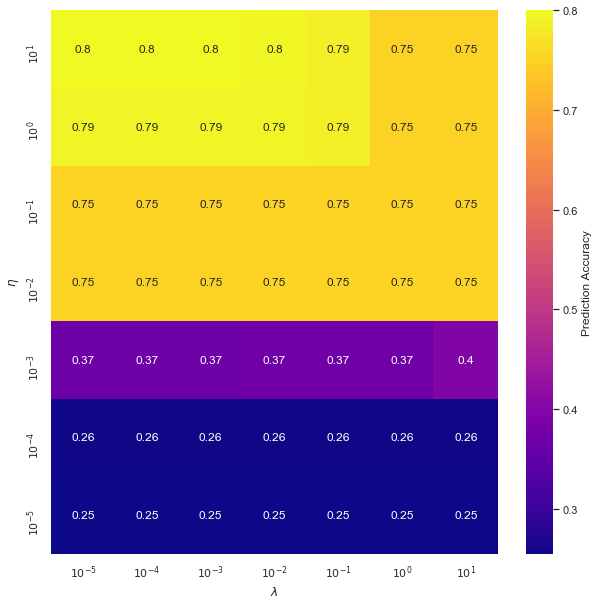

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
#PLOT OVER HYPERPARAMETER 10, 10

sns.set()
labels = ['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$','$10^1$',]
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy_NN, annot=True, ax=ax, cmap="plasma", cbar_kws={'label': 'Prediction Accuracy'})
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.ylim(0,7)
plt.show()

In [17]:
# REST BEST VALUES FROM KFOLD
NN = Neural_Network('REGRESSOR', X_train, y_train, ['SIGMOID', 'SIGMOID', 'SIGMOID'], 
                                  epochs = 10, batchsize = 100, iterations = None, hidden_layers =2, 
                                  hidden_neurons = [10,10], eta = 1, lambd = 10e-3)
NN.train(X_train, y_train)
_, prob = NN.feed_out_regressor(X_test)
pred = NN.score_binary(prob[-1])
accuracy = NN.accuracy(pred, y_test)
print(accuracy)

0.8172605978719811


In [31]:
# 80,20 neurons, 2 layers
from sklearn.model_selection import KFold

eta_vec = np.logspace(-5, 1, 7)
lam_vec = np.logspace(-5, 1, 7)
test_accuracy_NN = np.zeros((len(eta_vec), len(lam_vec)))

for i, eta in enumerate(eta_vec):
    for j, lam in enumerate(lam_vec):
        kf = KFold(n_splits = 5, shuffle = True)
        accuracy = 0
        for tr_idx, val_idx in kf.split(X_train):          
            NN = Neural_Network('REGRESSOR', X_train[tr_idx], y_train[tr_idx], ['SIGMOID', 'SIGMOID', 'SIGMOID'], 
                                  epochs = 10, batchsize = 100, iterations = None, hidden_layers =2, 
                                  hidden_neurons = [80,20], eta = eta, lambd = lam)
            NN.train(X_train[tr_idx], y_train[tr_idx])
            _, prob = NN.feed_out_regressor(X_train[val_idx])
            pred = NN.score_binary(prob[-1])
            accuracy += NN.accuracy(pred, y_train[val_idx])
        accuracy = accuracy/5
        test_accuracy_NN[i][j] = accuracy

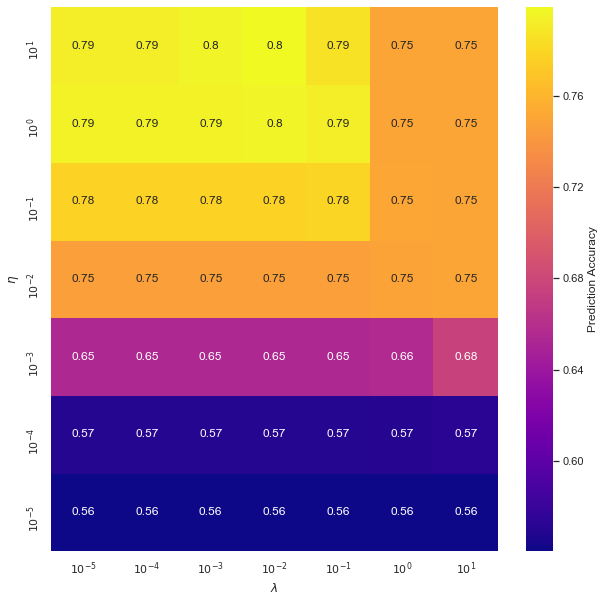

In [32]:
#PLOT OVER HYPERPARAMETER 80,20
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize = (10, 10))
labels = ['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$','$10^1$',]


sns.heatmap(test_accuracy_NN, annot=True, ax=ax1, cmap="plasma", cbar_kws={'label': 'Prediction Accuracy'})
ax1.set_xticklabels(labels)
ax1.set_yticklabels(labels)
ax1.set_ylabel("$\eta$")
ax1.set_xlabel("$\lambda$")



plt.ylim(0,7)
plt.show()

In [33]:
# REST BEST VALUES FROM KFOLD
NN = Neural_Network('REGRESSOR', X_train, y_train, ['SIGMOID', 'SIGMOID', 'SIGMOID'], 
                                  epochs = 100, batchsize = 100, iterations = None, hidden_layers =2, 
                                  hidden_neurons = [80,20], eta = 1e1, lambd = 1e-2)
NN.train(X_train, y_train)
_, prob = NN.feed_out_regressor(X_test)
pred = NN.score_binary(prob[-1])
accuracy = NN.accuracy(pred, y_test)
print(accuracy)

0.8017042837402119


In [34]:
# TESTING DIFFERENT EPOCHS AND BATCH SIZES 10,10
epoch_vals = np.concatenate((np.array([1]),np.arange(10,101,10)), axis=0) #1, 10, 20, ...100
batch_vals = [8,16,32,64,128,256] #2^N
accuracy_mat = np.zeros((len(epoch_vals),len(batch_vals)))
for i, batch in enumerate(batch_vals):
    for j, val in enumerate(epoch_vals):
        NN = Neural_Network('REGRESSOR', X_train, y_train, ['SIGMOID', 'SIGMOID', 'SIGMOID'], 
                                      epochs = val, batchsize = batch, iterations = None, hidden_layers =2, 
                                      hidden_neurons = [10,10], eta = 1e1, lambd = 1e-2)
        NN.train(X_train, y_train)
        _, prob = NN.feed_out_regressor(X_test)
        pred = NN.score_binary(prob[-1])
        acc = NN.accuracy(pred, y_test)
        accuracy_mat[j][i] = acc
        

(0.74, 0.805)

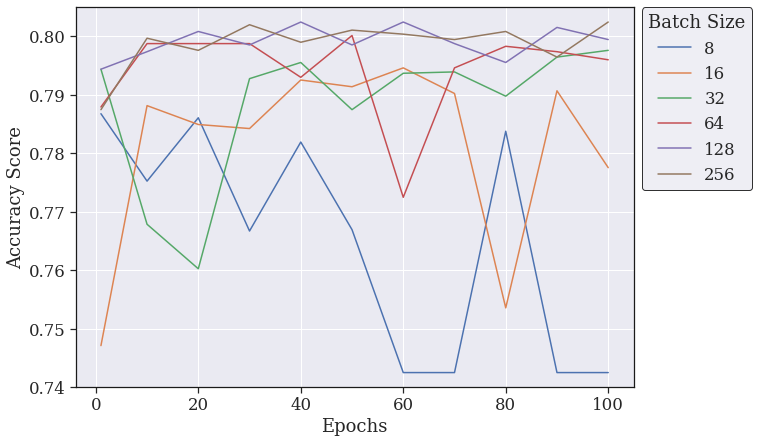

In [65]:
fig, ax = plt.subplots(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_style('dark',{'axes.edgecolor': '.1','xtick.bottom': True,'ytick.left': True,'axes.grid':True,
                      'grid.color':'white','font.family':['serif'],'font.serif':['serif']})

ax.plot(epoch_vals, accuracy_mat[:,0], label = '8')
ax.plot(epoch_vals, accuracy_mat[:,1], label = '16')
ax.plot(epoch_vals, accuracy_mat[:,2], label = '32')
ax.plot(epoch_vals, accuracy_mat[:,3], label = '64')
ax.plot(epoch_vals, accuracy_mat[:,4], label = '128')
ax.plot(epoch_vals, accuracy_mat[:,5], label = '256')
leg = ax.legend(title = 'Batch Size',bbox_to_anchor=(1, 1.02), fancybox = True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy Score')
ax.set_ylim(.74,.805)



In [ ]:
# NEURAL NET WITH TANH 

In [36]:
eta_vec = np.logspace(-5, 1, 7)
lam_vec = np.logspace(-5, 1, 7)
test_accuracy_NN_tanh = np.zeros((len(eta_vec), len(lam_vec)))

for i, eta in enumerate(eta_vec):
    for j, lam in enumerate(lam_vec):
        kf = KFold(n_splits = 5, shuffle = True)
        accuracy = 0
        for tr_idx, val_idx in kf.split(X_train):          
            NN = Neural_Network('REGRESSOR', X_train[tr_idx], y_train[tr_idx], ['TANH', 'TANH', 'TANH'], 
                                  epochs = 10, batchsize = 100, iterations = None, hidden_layers =2, 
                                  hidden_neurons = [10,10], eta = eta, lambd = lam)
            NN.train(X_train[tr_idx], y_train[tr_idx])
            _, prob = NN.feed_out_regressor(X_train[val_idx])
            pred = NN.score_binary(prob[-1])
            accuracy += NN.accuracy(pred, y_train[val_idx])
        accuracy = accuracy/5
        test_accuracy_NN_tanh[i][j] = accuracy

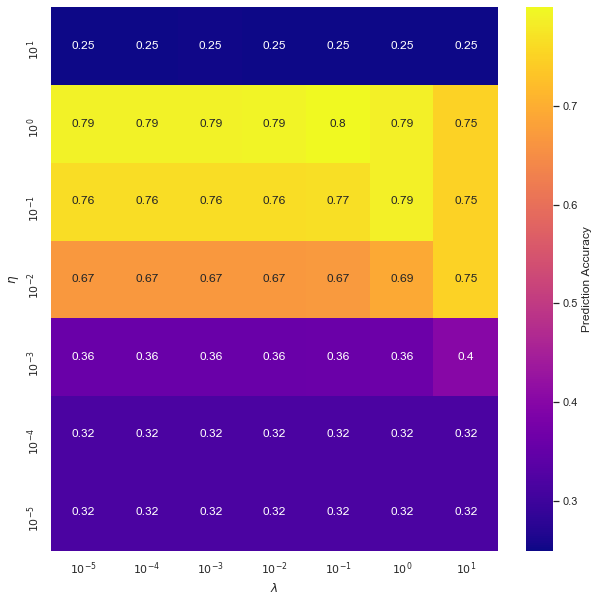

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
#PLOT OVER HYPERPARAMETER 10, 10

labels = ['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$','$10^1$',]
sns.set_style('dark')
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize = (10, 10))

sns.heatmap(test_accuracy_NN_tanh, annot=True, ax=ax, cmap="plasma", cbar_kws={'label': 'Prediction Accuracy'})
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.ylim(0,7)
plt.show()

In [41]:
#80, 20
from sklearn.model_selection import KFold
import numpy as np

eta_vec = np.logspace(-5, 1, 7)
lam_vec = np.logspace(-5, 1, 7)
test_accuracy_NN_tanh = np.zeros((len(eta_vec), len(lam_vec)))

for i, eta in enumerate(eta_vec):
    for j, lam in enumerate(lam_vec):
        kf = KFold(n_splits = 5, shuffle = True)
        accuracy = 0
        for tr_idx, val_idx in kf.split(X_train):          
            NN = Neural_Network('REGRESSOR', X_train[tr_idx], y_train[tr_idx], ['TANH', 'TANH', 'TANH'], 
                                  epochs = 10, batchsize = 100, iterations = None, hidden_layers =2, 
                                  hidden_neurons = [80, 20], eta = eta, lambd = lam)
            NN.train(X_train[tr_idx], y_train[tr_idx])
            _, prob = NN.feed_out_regressor(X_train[val_idx])
            pred = NN.score_binary(prob[-1])
            accuracy += NN.accuracy(pred, y_train[val_idx])
        accuracy = accuracy/5
        test_accuracy_NN_tanh[i][j] = accuracy

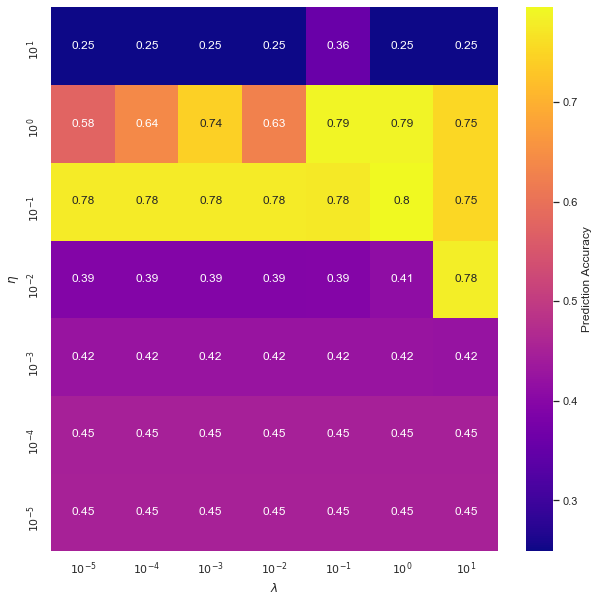

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
#PLOT OVER HYPERPARAMETER 80,20

labels = ['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$','$10^1$',]
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(test_accuracy_NN_tanh, annot=True, ax=ax, cmap="plasma", cbar_kws={'label': 'Prediction Accuracy'})
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.ylim(0,7)
plt.show()

In [43]:
NN1 = Neural_Network('REGRESSOR', X_train, y_train, ['TANH', 'TANH', 'TANH'], 
                                      epochs = 10, batchsize = 100, iterations = None, hidden_layers =2, 
                                      hidden_neurons = [10,10], eta = 1e0, lambd = 1e-1)
NN1.train(X_train, y_train)
_, prob = NN1.feed_out_regressor(X_test)
pred = NN1.score_binary(prob[-1])
acc = NN1.accuracy(pred, y_test)
print(acc)

0.7966374942422847


In [44]:
# TESTING DIFFERENT EPOCHS AND BATCH SIZES 15,15
from sklearn.model_selection import KFold
import numpy as np

epoch_vals = np.concatenate((np.array([1]),np.arange(10,101,10)), axis=0) #1, 10, 20, ...100
batch_vals = [8,16,32,64,128,256] #2^N
accuracy_mat_tanh = np.zeros((len(epoch_vals),len(batch_vals)))
for i, batch in enumerate(batch_vals):
    for j, val in enumerate(epoch_vals):
        NN = Neural_Network('REGRESSOR', X_train, y_train, ['TANH', 'TANH', 'TANH'], 
                                      epochs = val, batchsize = batch, iterations = None, hidden_layers =2, 
                                      hidden_neurons = [10,10], eta = 1e0, lambd = 1e-1)
        NN.train(X_train, y_train)
        _, prob = NN.feed_out_regressor(X_test)
        pred = NN.score_binary(prob[-1])
        acc = NN.accuracy(pred, y_test)
        accuracy_mat_tanh[j][i] = acc

{'axes.facecolor': '#EAEAF2', 'axes.edgecolor': '.1', 'axes.grid': True, 'axes.axisbelow': True, 'axes.labelcolor': '.15', 'figure.facecolor': 'white', 'grid.color': 'white', 'grid.linestyle': '-', 'text.color': '.15', 'xtick.color': '.15', 'ytick.color': '.15', 'xtick.direction': 'out', 'ytick.direction': 'out', 'lines.solid_capstyle': 'round', 'patch.edgecolor': 'w', 'image.cmap': 'rocket', 'font.family': ['serif'], 'font.sans-serif': ['Arial', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'], 'patch.force_edgecolor': True, 'xtick.bottom': True, 'xtick.top': False, 'ytick.left': True, 'ytick.right': False, 'axes.spines.left': True, 'axes.spines.bottom': True, 'axes.spines.right': True, 'axes.spines.top': True}


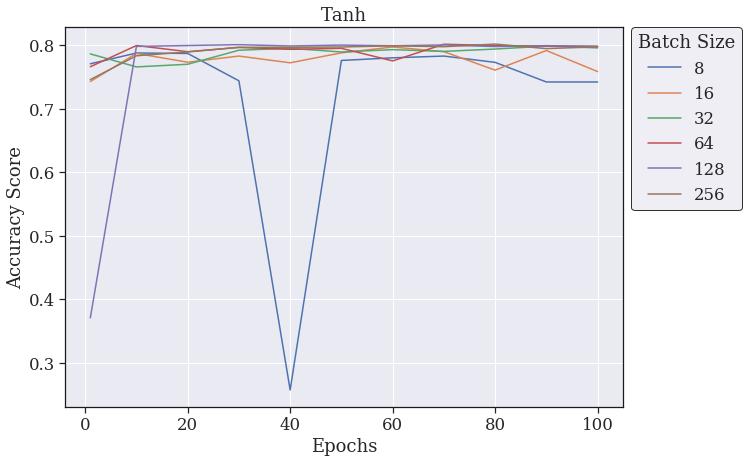

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_style('dark',{'axes.edgecolor': '.1','xtick.bottom': True,'ytick.left': True,'axes.grid':True,
                      'grid.color':'white','font.family':['serif'],'font.serif':['serif']})

ax.plot(epoch_vals, accuracy_mat_tanh[:,0], label = '8')
ax.plot(epoch_vals, accuracy_mat_tanh[:,1], label = '16')
ax.plot(epoch_vals, accuracy_mat_tanh[:,2], label = '32')
ax.plot(epoch_vals, accuracy_mat_tanh[:,3], label = '64')
ax.plot(epoch_vals, accuracy_mat_tanh[:,4], label = '128')
ax.plot(epoch_vals, accuracy_mat_tanh[:,5], label = '256')
leg = ax.legend(title = 'Batch Size',bbox_to_anchor=(1, 1.02), fancybox = True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1)
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy Score')
ax.set_title('Tanh')


print(sns.axes_style())

# SKLEARN

In [56]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
import numpy as np
#10,10
eta_vec = np.logspace(-5, 1, 7)
lam_vec = np.logspace(-5, 1, 7)
test_accuracy_NN_sklearn = np.zeros((len(eta_vec), len(lam_vec)))

for i, eta in enumerate(eta_vec):
    for j, lam in enumerate(lam_vec):
        kf = KFold(n_splits = 5, shuffle = True)
        accuracy = 0
        for tr_idx, val_idx in kf.split(X_train):          
            NN = MLPClassifier(hidden_layer_sizes=(10,10), activation='logistic', solver='sgd',batch_size = 100, 
                               max_iter=10,alpha=lam,learning_rate_init=eta)
            NN.fit(X_train[tr_idx], y_train[tr_idx,0])
            score = NN.score(X_train[val_idx],y_train[val_idx,0])
            accuracy += score
        accuracy = accuracy/5
        test_accuracy_NN_sklearn[i][j] = accuracy


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

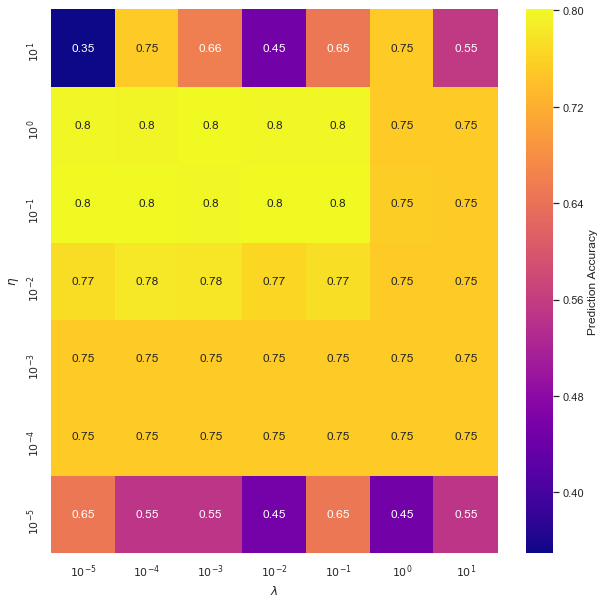

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
#PLOT OVER HYPERPARAMETER 10,10

labels = ['$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$','$10^1$',]
fig, ax = plt.subplots(figsize = (10, 10))
sns.set_style('dark')
sns.set(font_scale=1)
sns.heatmap(test_accuracy_NN_sklearn, annot=True, ax=ax, cmap="plasma", cbar_kws={'label': 'Prediction Accuracy'})
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.ylim(0,7)
plt.show()

In [58]:
# TESTING DIFFERENT EPOCHS AND BATCH SIZES 15,15
from sklearn.model_selection import KFold
import numpy as np

epoch_vals = np.concatenate((np.array([1]),np.arange(10,101,10)), axis=0) #1, 10, 20, ...100
batch_vals = [8,16,32,64,128,256] #2^N
accuracy_mat_sklearn = np.zeros((len(epoch_vals),len(batch_vals)))
for i, batch in enumerate(batch_vals):
    for j, val in enumerate(epoch_vals):
        NN = MLPClassifier(hidden_layer_sizes=(10,10), activation='logistic', solver='sgd',batch_size = 100, 
                               max_iter=10,alpha=1e-3,learning_rate_init=1e0)
        NN.fit(X_train, y_train[:,0])
        score = NN.score(X_test,y_test[:,0])
        accuracy_mat_sklearn[j][i] = score

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

Text(0.5, 1.0, 'SciKit-Learn')

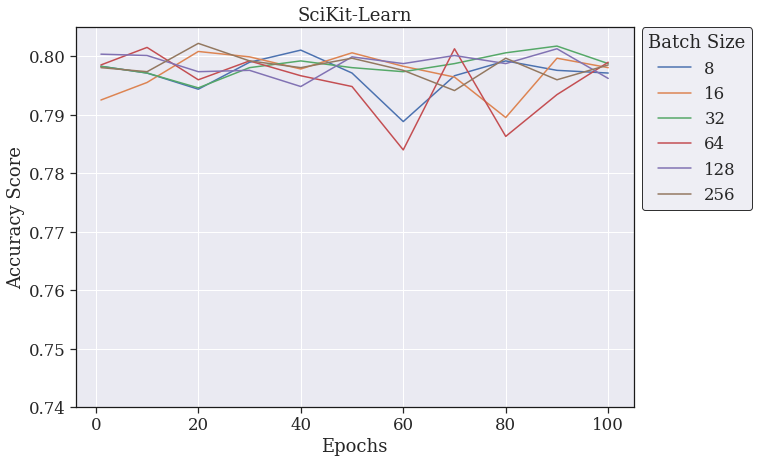

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,7))
sns.set(font_scale=1.5)
sns.set_style('dark',{'axes.edgecolor': '.1','xtick.bottom': True,'ytick.left': True,'axes.grid':True,
                      'grid.color':'white','font.family':['serif'],'font.serif':['serif']})

ax.plot(epoch_vals, accuracy_mat_sklearn[:,0], label = '8')
ax.plot(epoch_vals, accuracy_mat_sklearn[:,1], label = '16')
ax.plot(epoch_vals, accuracy_mat_sklearn[:,2], label = '32')
ax.plot(epoch_vals, accuracy_mat_sklearn[:,3], label = '64')
ax.plot(epoch_vals, accuracy_mat_sklearn[:,4], label = '128')
ax.plot(epoch_vals, accuracy_mat_sklearn[:,5], label = '256')
leg = ax.legend(title = 'Batch Size',bbox_to_anchor=(1, 1.02), fancybox = True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1)
ax.set_ylim(.74,.805)
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy Score')
ax.set_title('SciKit-Learn')


